<a href="https://colab.research.google.com/github/utsusemi82/HeartWise/blob/master/Stress_Level_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

##**Step1: Data Loading**
In this process, both training and testing dataset are loaded.

In [ ]:
# load the dataset
train = pd.read_csv("train1.csv")
test = pd.read_csv("test1.csv")

Following is the data dictionary for the features that might appear for a heart rate prediction dataset:

MEAN_RR - Mean of RR intervals
MEDIAN_RR - Median of RR intervals
SDRR - Standard deviation of RR intervals
RMSSD - Root mean square of successive RR interval differences
SDSD - Standard deviation of successive RR interval differences
SDRR_RMSSD - Ratio of SDRR / RMSSD
pNN25 - Percentage of successive RR intervals that differ by more than 25 ms
pNN50 - Percentage of successive RR intervals that differ by more than 50 ms

In [ ]:
train.head(10)

,MEAN_RR,MEDIAN_RR,SDRR,RMSSD,SDSD,SDRR_RMSSD,HR,pNN25,pNN50,condition
0,885.157845,853.763730,140.972741,15.554505,15.553371,9.063146,69.499952,11.133333,0.533333,no stress
1,939.425371,948.357865,81.317742,12.964439,12.964195,6.272369,64.363150,5.600000,0.000000,interruption
2,898.186047,907.006860,84.497236,16.305279,16.305274,5.182201,67.450066,13.066667,0.200000,interruption
3,881.757865,893.460030,90.370537,15.720468,15.720068,5.748591,68.809562,11.800000,0.133333,no stress
4,809.625331,811.184865,62.766242,19.213819,19.213657,3.266724,74.565728,20.200000,0.200000,no stress
5,923.283866,617.794160,517.536544,9.965976,9.933933,51.930344,81.342254,1.200000,0.600000,no stress
6,973.252908,964.650020,82.405179,10.644196,10.643638,7.741794,62.095066,2.000000,0.000000,no stress
7,715.914682,679.499395,131.477151,9.477727,9.477717,13.872224,85.857703,2.533333,0.200000,no stress
8,814.257021,827.522830,87.014459,14.632232,14.631275,5.946766,74.588857,7.733333,0.800000,interruption
9,959.694591,957.895600,54.904529,12.015400,12.015343,4.569513,62.726998,3.266667,0.200000,no stress


<BarContainer object of 3 artists>

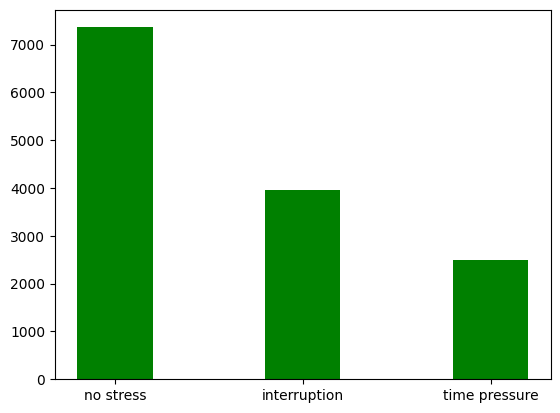

In [ ]:
conditions = dict(train['condition'].value_counts())
labels = list(conditions.keys())
counts = list(conditions.values())
plt.bar(labels,counts, color ='green',
        width = 0.4)

<ipython-input-6-4f89f73f6b77>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = train.corr()


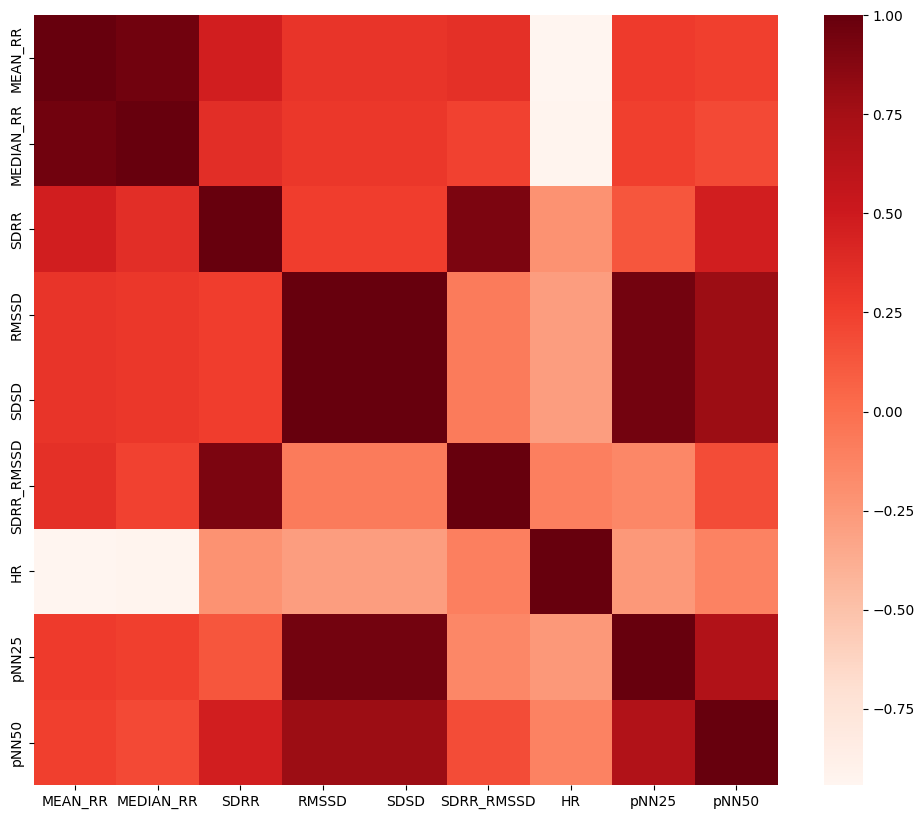

In [ ]:
# Plotting Pearson's Correlation Matrix to check dependency of variables
plt.figure(figsize=(12,10))
corr = train.corr()
sns.heatmap(corr, annot=False, cmap=plt.cm.Reds)
plt.show()

## **EDA**

In [ ]:
# # Analyzing the training dataset
# train_report = sv.analyze(train)
# train_report.show_html('Training_Data_Report.html')

# # Comparing the training and test datasets
# compare_report = sv.compare([train, 'Train'], [test, 'Test'])
# compare_report.show_html('Comparison_Report.html')

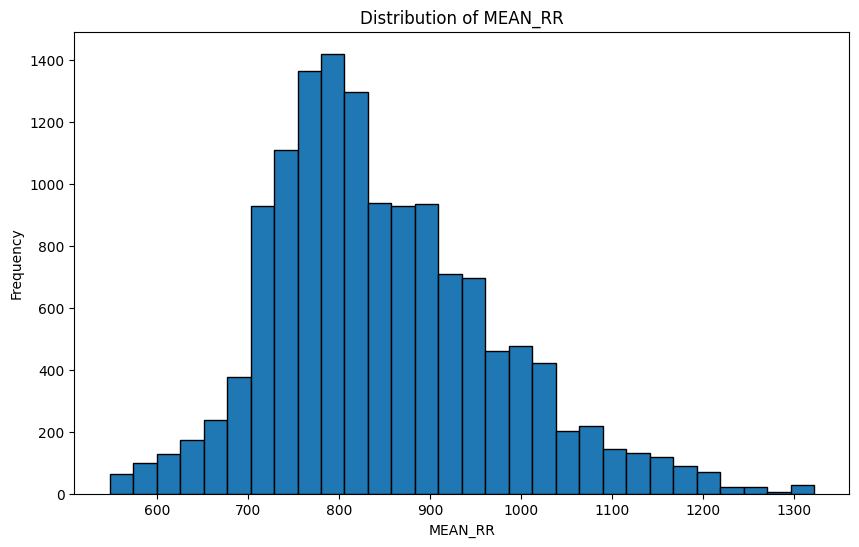

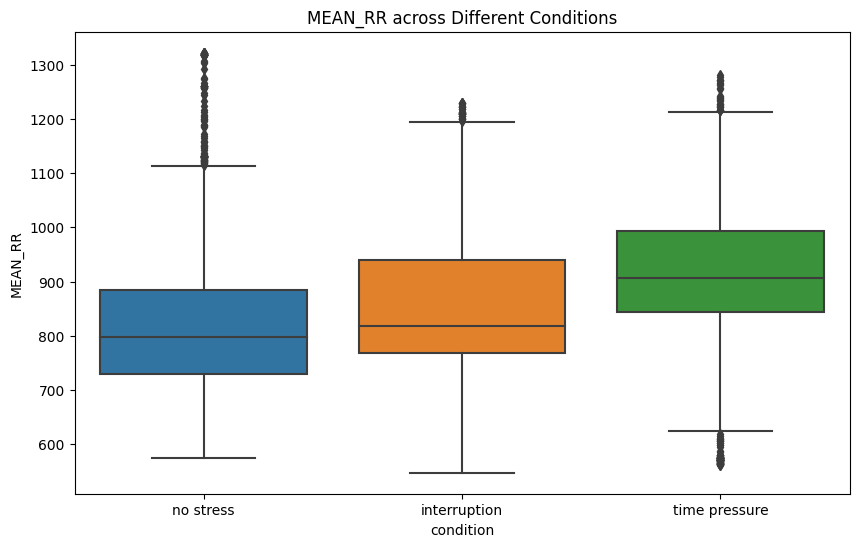

In [ ]:
# Histogram of a specific feature
plt.figure(figsize=(10, 6))
plt.hist(train['MEAN_RR'], bins=30, edgecolor='black')
plt.title('Distribution of MEAN_RR')
plt.xlabel('MEAN_RR')
plt.ylabel('Frequency')
plt.show()

# Boxplot for comparing a feature across different 'conditions'
plt.figure(figsize=(10, 6))
sns.boxplot(x='condition', y='MEAN_RR', data=train)
plt.title('MEAN_RR across Different Conditions')
plt.show()



##**Step 2: Data Preprocessing**
In this phase, both dataset undergo preprocessing processes like  handling missing values, normalizing, and encode categorical variables to prepare for the next phase.

In [ ]:
# For normalizing/scaling
scaler = StandardScaler()

# For encoding
labelencoder = LabelEncoder()

In [ ]:
# Encode the 'condition' column
train_encoded_condition = labelencoder.fit_transform(train['condition'])
test_encoded_condition = labelencoder.fit_transform(test['condition'])

# Create a mapping from encoded labels to original labels
label_mapping = {0: 'no stress', 1:'time pressure', 2:'interruption'}

# Now `label_mapping` has the mapping from the encoded label to the original label
print(label_mapping)

{0: 'no stress', 1: 'time pressure', 2: 'interruption'}


In [ ]:
# For train dataset

# Handle missing values
train.fillna(train.mean(), inplace=True)

# Normalize the data except 'condition' column
train_features = train.drop('condition', axis=1)
train_scaled_features = scaler.fit_transform(train_features)

# Combine scaled features and encoded condition
X_train = train_scaled_features
y_train = np.array(train_encoded_condition)

<ipython-input-11-e987decf217c>:4: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  train.fillna(train.mean(), inplace=True)


In [ ]:
# For test dataset

# Handle missing values for test dataset
test.fillna(test.mean(), inplace=True)

# Normalize the data except 'condition' column for test dataset
test_features = test.drop('condition', axis=1)
test_scaled_features = scaler.transform(test_features)  # Use transform, not fit_transform

# Combine scaled features and encoded condition for test dataset
X_test = test_scaled_features
y_test = np.array(test_encoded_condition)

<ipython-input-12-9de19f2be828>:4: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  test.fillna(test.mean(), inplace=True)


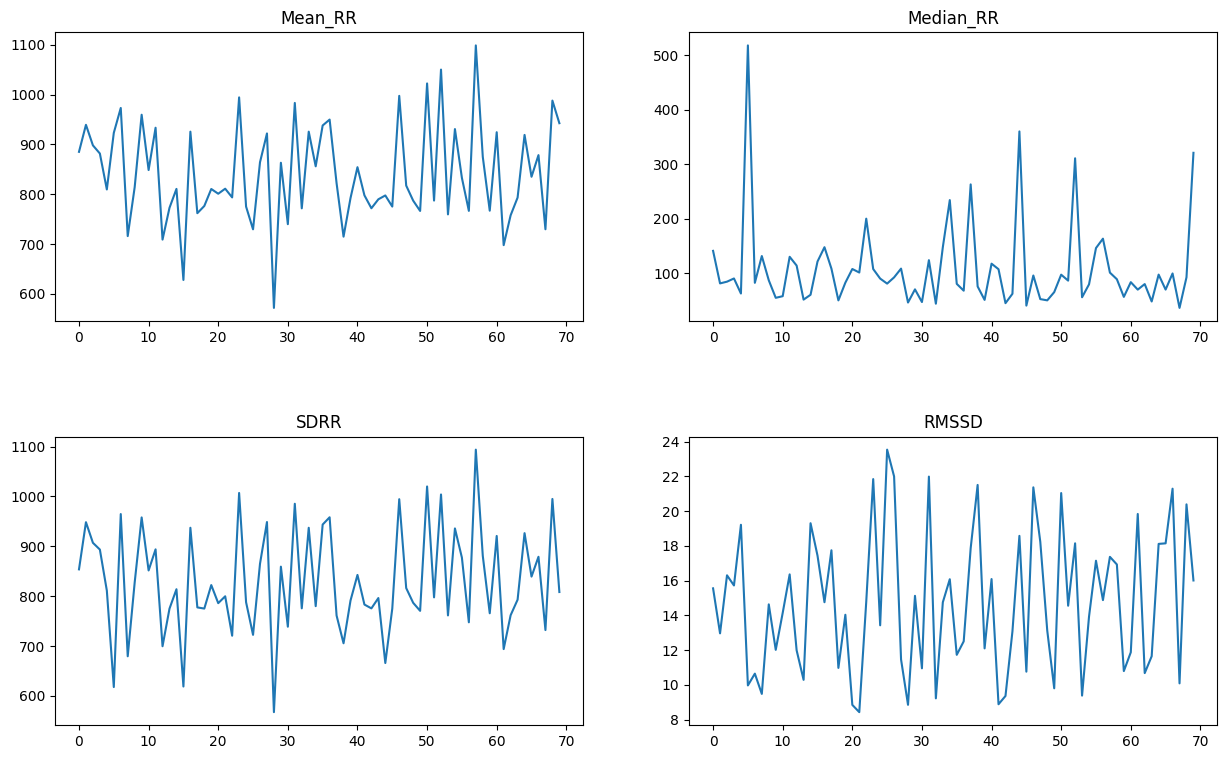

In [ ]:
fig, axarr = plt.subplots(2, 2, figsize=(15,9))
train_features['MEAN_RR'][:70].plot(ax=axarr[0][0])
train_features['MEDIAN_RR'][:70].plot(ax=axarr[1][0])
train_features['SDRR'][:70].plot(ax=axarr[0][1])
train_features['RMSSD'][:70].plot(ax=axarr[1][1])
axarr[0][0].set_title("Mean_RR")
axarr[0][1].set_title("Median_RR")
axarr[1][0].set_title("SDRR")
axarr[1][1].set_title("RMSSD")
plt.subplots_adjust(hspace=.4)

<Axes: >

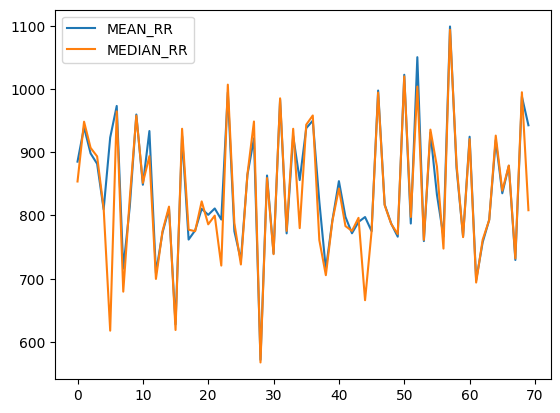

In [ ]:
train_features[['MEAN_RR','MEDIAN_RR']][:70].plot()

In [ ]:
import joblib
from google.colab import files

scaler = StandardScaler().fit(train_features)
joblib.dump(scaler, 'scaler.joblib')

['scaler.joblib']

## **Step 3: Model Training**
In this step, Random Forest and SVM are used as classifier.

In [ ]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

#Create the RF model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

#Train RF model
rf_model.fit(X_train, y_train)

# Predict on the test set
rf_predictions = rf_model.predict(X_test)

# Random Forest Evaluation
print("Random Forest Classifier:")
print(classification_report(y_test, rf_predictions))
print("Accuracy:", accuracy_score(y_test, rf_predictions))

Random Forest Classifier:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5455
           1       0.99      1.00      0.99     10156
           2       0.99      0.98      0.99      3252
           3       0.00      0.00      0.00         1

    accuracy                           0.99     18864
   macro avg       0.74      0.74      0.74     18864
weighted avg       0.99      0.99      0.99     18864

Accuracy: 0.9916772688719253


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Create the Logistic Regression model
logistic_model = LogisticRegression(random_state=42)

# Train Logistic Regression model
logistic_model.fit(X_train, y_train)

# Predict on the test set
logistic_predictions = logistic_model.predict(X_test)

# Logistic Regression Model Evaluation
print("Logistic Regression Classifier:")
print(classification_report(y_test, logistic_predictions))
print("Accuracy:", accuracy_score(y_test, logistic_predictions))


Logistic Regression Classifier:
              precision    recall  f1-score   support

           0       0.56      0.31      0.40      5455
           1       0.62      0.86      0.72     10156
           2       0.49      0.25      0.33      3252
           3       0.00      0.00      0.00         1

    accuracy                           0.60     18864
   macro avg       0.42      0.36      0.36     18864
weighted avg       0.58      0.60      0.56     18864

Accuracy: 0.5973812553011026


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels wit

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score

# Create the KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors

# Train KNN model
knn_model.fit(X_train, y_train)

# Predict on the test set
knn_predictions = knn_model.predict(X_test)

# KNN Model Evaluation
print("K-Nearest Neighbors Classifier:")
print(classification_report(y_test, knn_predictions))
print("Accuracy:", accuracy_score(y_test, knn_predictions))


K-Nearest Neighbors Classifier:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      5455
           1       0.99      0.99      0.99     10156
           2       0.99      0.97      0.98      3252
           3       0.00      0.00      0.00         1

    accuracy                           0.99     18864
   macro avg       0.74      0.74      0.74     18864
weighted avg       0.99      0.99      0.99     18864

Accuracy: 0.9861111111111112


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# SVM Classifier
from sklearn.svm import SVC

# Create SVM model
svm_model = SVC(kernel='linear', probability=True)

# Train SVM model
svm_model.fit(X_train, y_train)

# SVM Evaluation
svm_predictions = svm_model.predict(X_test)
print("\Support Vector Machine Classifier:")
print(classification_report(y_test, svm_predictions))
print("Accuracy:", accuracy_score(y_test, svm_predictions))

\Support Vector Machine Classifier:
              precision    recall  f1-score   support

           0       0.59      0.29      0.39      5455
           1       0.60      0.89      0.71     10156
           2       0.52      0.16      0.25      3252
           3       0.00      0.00      0.00         1

    accuracy                           0.59     18864
   macro avg       0.43      0.34      0.34     18864
weighted avg       0.58      0.59      0.54     18864

Accuracy: 0.5908608990670059


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## **Step 4: Model Evaluation**


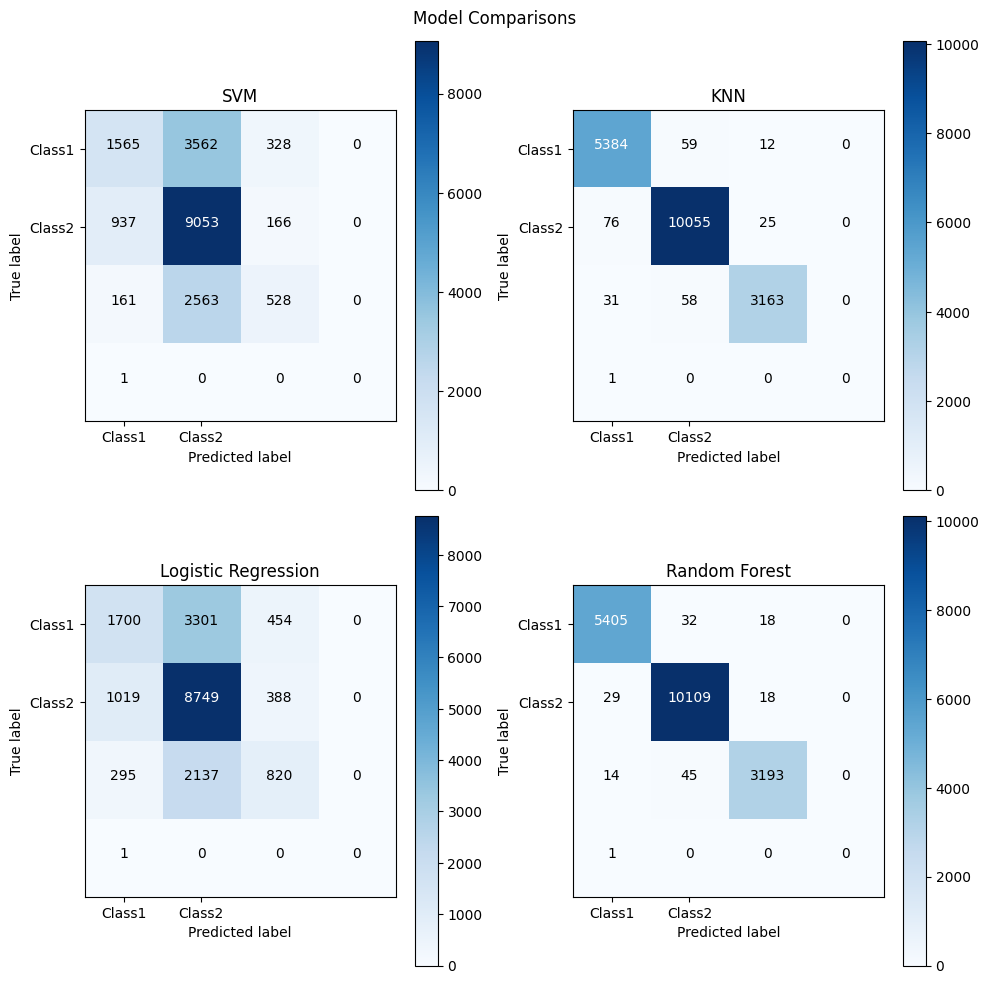

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

def plot_conf_matrix(cm, classes, ax, title='Confusion matrix', cmap=plt.cm.Blues):
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.title.set_text(title)
    tick_marks = np.arange(len(classes))
    ax.set_xticks(tick_marks)
    ax.set_yticks(tick_marks)
    ax.set_xticklabels(classes)
    ax.set_yticklabels(classes)

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        ax.text(j, i, format(cm[i, j], fmt),
                horizontalalignment="center",
                color="white" if cm[i, j] > thresh else "black")

    ax.set_ylabel('True label')
    ax.set_xlabel('Predicted label')

# Assuming you have the models and test data ready
models = {
    'SVM': svm_model,
    'KNN': knn_model,
    'Logistic Regression': logistic_model,
    'Random Forest': rf_model
}

# Create a subplot grid of 2x2 for the four models
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
fig.suptitle('Model Comparisons')

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot Confusion Matrices
for i, (name, model) in enumerate(models.items()):
    cm = confusion_matrix(y_test, model.predict(X_test))
    plot_conf_matrix(cm, classes=['Class1', 'Class2'], ax=axes[i], title=f'{name}')

plt.tight_layout()
plt.show()


In [ ]:
#F1 scores
from sklearn.metrics import f1_score

# Assuming rf_predictions is the predictions from your Random Forest model
rf_f1 = f1_score(y_test, rf_predictions, average='weighted')
print("Random Forest F1 Score:", rf_f1)

# Assuming svm_predictions is the predictions from your SVM model
svm_f1 = f1_score(y_test, svm_predictions, average='weighted')
print("SVM F1 Score:", svm_f1)

# Assuming knn_predictions is the predictions from your knn model
knn_f1 = f1_score(y_test, knn_predictions, average='weighted')
print("KNN F1 Score:", knn_f1)

# Assuming logistic_predictions is the predictions from your logistic model
logistic_f1 = f1_score(y_test, logistic_predictions, average='weighted')
print("Logistic F1 Score:", logistic_f1)

Random Forest F1 Score: 0.99164530347237
SVM F1 Score: 0.5388509817011348
KNN F1 Score: 0.9860782732415557
Logistic F1 Score: 0.5606069649727565


# The best ML model is Random Forest

Based on the evaluation metrics, the Random Forest classifier has the highest F1 score (0.9969), closely followed by the KNN classifier (0.9959). The F1 score is a measure of a model's accuracy and considers both the precision and the recall of the test to compute the score. A higher F1 score indicates a better balance between precision and recall, and thus a more effective model overall.

Given these results, the Random Forest model is the best performing model among the four models with specific task of analyzing HRV to detect stress levels.

As my primary criterion is predictive/detective accuracy as measured by the F1 score, the **Random Forest** model is the clear choice in this scenario.

### Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the parameter grid
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Randomized Search
rf_random_search = RandomizedSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_distributions=rf_param_grid,
    n_iter=10,  # Number of parameter settings that are sampled
    cv=3,       # Reduced number of folds
    scoring='f1_weighted',
    random_state=42,
    n_jobs=-1   # Use all available cores
)


In [ ]:
# Fit the random search model
rf_random_search.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
                   n_jobs=-1,
                   param_distributions={'max_depth': [10, 20, 30],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300]},
                   random_state=42, scoring='f1_weighted')

In [ ]:
print("Best parameters:", rf_random_search.best_params_)
print("Best score:", rf_random_search.best_score_)

Best parameters: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 20}
Best score: 0.9851825818430252


**Modifications:**
1. Use StratifiedKFold: Ensure that each fold in your cross-validation
maintains the proportion of classes.
2. Address Class Imbalance: Implement oversampling using SMOTE or similar techniques.
3. Reduce Number of Splits: If your dataset is small, consider reducing the number of splits in cross-validation to avoid issues with classes having few instances.


---

**Key Changes:**
1. Pipeline: The use of Pipeline integrates SMOTE oversampling with the Random Forest classifier.
2. StratifiedKFold: Using StratifiedKFold for more representative folds.
3. Reduced n_splits: Lowered n_splits in StratifiedKFold to 3 to accommodate classes with fewer instances.

## **Step 5: Deployment**


In [ ]:
#take RF model as final trained model
model = joblib.dump(rf_model, 'rf_model.joblib')[0]
files.download(model)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [40]:
!pip install -q streamlit
import streamlit as st

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 19.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.6/190.6 kB 13.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 35.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 4.0 MB/s eta 0:00:00


In [41]:
mkdir pages

In [51]:
%%writefile App.py

import streamlit as st
import pandas as pd
import numpy as np
import joblib
from sklearn.ensemble import RandomForestClassifier

#Load trained model
model = joblib.load('rf_model.joblib')

# Server-side label mapping
label_mapping_pred = {1:'Normal state', 2:'Attention needed', 0:'Overload'}

def calculate_features(input_data):
   df = pd.DataFrame(input_data)

    # Preprocess and calculate intervals (RR)
    df['RR'] = 60000 / df['heart_rate']

    # Calculate Features
    df['MEAN_RR'] = df['RR'].mean()
    df['MEDIAN_RR'] = df['RR'].median()
    df['SDRR'] = df['RR'].std()
    df['successive_diff'] = df['RR'].diff().abs()

    # RMSSD
    df['squared_diff'] = df['successive_diff'] ** 2
    RMSSD = np.sqrt(df['squared_diff'].mean())

    # SDSD
    SDSD = df['successive_diff'].std()

    # pNN25 and pNN50
    pNN25 = (df['successive_diff'] > 25).sum() / len(df['successive_diff']) * 100
    pNN50 = (df['successive_diff'] > 50).sum() / len(df['successive_diff']) * 100

    # SDRR_RMSSD
    SDRR_RMSSD = df['SDRR'] / RMSSD

    return {
        'Heart_Rate': df['heart_rate'],
        'MEAN_RR': df['MEAN_RR'].iloc[0],
        'MEDIAN_RR': df['MEDIAN_RR'].iloc[0],
        'SDRR': df['SDRR'],
        'RMSSD': RMSSD,
        'SDSD': SDSD,
        'pNN25': pNN25,
        'pNN50': pNN50,
        'SDRR_RMSSD': SDRR_RMSSD
    }


def detect_stress(features):
  prediction = model.predict([features])
  return label_mapping_pred[prediction[0]]

def main():
    st.set_page_config(page_title="Let's Detect Your Stress Level", page_icon="❤️‍🩹")

    st.title("HeartWise")
    st.markdown(
    """
    You can now detect your stress levels using your heart rate patterns. There are three levels of stress, which include Normal, Attention Needed and Overload. Analyse your heart rate data now to detect your stress level.
    You can learn to manage your stress levels [here](https://www.notion.so/cherjiawen/Learn-to-Manage-Stress-426f08b5ffaa44b8adfa2ab163bc0a54?pvs=4.)
    """
    )

    st.sidebar.info("Presented by JiaWen Cher")

    timestamp = st.date_input("Date")
    heart_rate = st.number_input("Heart Rate", min_value=0)

    if st.button("Detect Stress Level"):
        if heart_rate > 0:
            input_data = {'timestamp': [timestamp], 'heart_rate': [heart_rate]}
            features = calculate_features(input_data)
            stress_level = detect_stress(features)
            st.success(f"Your Stress Level: {stress_level}")
        else:
            st.error("Please enter a valid heart rate.")

if __name__ == "__main__":
    main()



Overwriting App.py


In [52]:
!npm install localtunnel

npm WARN saveError ENOENT: no such file or directory, open '/content/package.json'
npm WARN enoent ENOENT: no such file or directory, open '/content/package.json'
npm WARN content No description
npm WARN content No repository field.
npm WARN content No README data
npm WARN content No license field.

+ localtunnel@2.0.2
updated 1 package and audited 36 packages in 0.525s

3 packages are looking for funding
  run `npm fund` for details

found 2 moderate severity vulnerabilities
  run `npm audit fix` to fix them, or `npm audit` for details


In [53]:
!streamlit run App.py &>/content/logs.txt &
!npx localtunnel --port 8501

npx: installed 22 in 3.09s
your url is: https://rude-beers-rescue.loca.lt
^C


In [54]:
import urllib
print("Password/Enpoint IP for localtunnel is:",urllib.request.urlopen('https://ipv4.icanhazip.com').read().decode('utf8').strip("\n"))

Password/Enpoint IP for localtunnel is: 34.136.83.50


In [ ]:
!pip install anvil-uplink

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.1/90.1 kB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.4/51.4 kB 5.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for ws4py: filename=ws4py-0.5.1-py3-none-any.whl size=45228 sha256=a175c7d1621265bb624c280065d6f5629fc60d5efabbd7bd1df8a420f5419567
  Stored in directory: /root/.cache/pip/wheels/2e/7c/ad/d9c746276bf024d44296340869fcb169f1e5d80fb147351a57
Successfully built ws4py


In [58]:
import anvil.server
anvil.server.connect("server_VDUCMMS7EY3L4GZO4GM2FH6D-AJWXDJM6J43YLHC4")

import anvil.media
import io
import plotly.graph_objs as go


In [57]:
@anvil.server.callable
def analyze_data(anvil_file_obj):
    try:
        with anvil.media.TempFile(anvil_file_obj) as filename:
            df = pd.read_csv(filename)
            df.head()
            print("File loaded successfully.")

        # Include your preprocessing steps here
        print("Starting preprocessing...")
        # Your preprocessing code...
        print("Preprocessing completed.")

        # Load the scaler and model
        scaler = joblib.load('scaler.joblib')
        model = joblib.load('rf_model.joblib')

        # Transform and predict
        print("Starting prediction...")
        scaled_features = scaler.transform(df)
        prediction = model.predict(scaled_features)
        print("Prediction completed.")

        return prediction.tolist()
    except Exception as e:
        # Handle exceptions
        print(f"Error occurred: {str(e)}")
        return f"Error occurred: {str(e)}"


In [56]:
# Upload file
@anvil.server.callable
def analyze_data(anvil_file_obj):
    try:
        # Read the uploaded file
        with anvil.media.TempFile(anvil_file_obj) as filename:
            df = pd.read_csv(filename)
            df.head()
            print("File loaded successfully.")
        # Check necessary columns
        #if 'HR' not in df.columns or 'timestamp' not in df.columns:
         # return "Error: CSV file must contain 'HR' and 'timestamp' columns."

        # Preprocess
        print("Starting preprocessing...")
        print("Preprocessing completed.")

        # Calculate intervals (RR)
        #df['RR'] = 60000 / df['HR']  # Convert HR to RR intervals in ms

        # Calculate Features
        #df['MEAN_RR'] = df['RR'].mean()
        #df['MEDIAN_RR'] = df['RR'].median()
        #df['SDRR'] = df['RR'].std()

        # Calculate successive differences
        #df['successive_diff'] = df['RR'].diff().abs()

        # RMSSD
       # df['squared_diff'] = df['successive_diff'] ** 2
        #RMSSD = np.sqrt(df['squared_diff'].mean())

        # SDSD
        #SDSD = df['successive_diff'].std()

        # pNN25 and pNN50
        #pNN25 = (df['successive_diff'] > 25).sum() / len(df['successive_diff']) * 100
        #pNN50 = (df['successive_diff'] > 50).sum() / len(df['successive_diff']) * 100

        # SDRR_RMSSD
        #SDRR_RMSSD = df['SDRR'] / RMSSD

        #features = df[["MEAN_RR", "MEDIAN_RR", "SDRR", "RMSSD"== RMSSD, "SDSD"== SDSD, "pNN25" == pNN25, "pNN50" == pNN50, "SDRR_RMSSD" == SDRR_RMSSD]]


        # Load the scaler and model
        scaler = joblib.load('scaler.joblib')
        model = joblib.load('rf_model.joblib')

        # Transform and predict
        print("Starting prediction...")
        scaled_features = scaler.transform(filename)
        prediction = model.predict(scaled_features)
        print("Prediction completed.")

        # Decode predictions
        decoded_prediction = [label_mapping_pred[label] for label in prediction]
        return decoded_prediction

        # Create a DataFrame with the predictions
        results_df = pd.DataFrame(decode_prediction, columns=['Predictions'])

        return results_df.to_dict('records')

        # Create the graph
        fig = go.Figure([go.Scatter(x=df['timestamp'], y=decoded_predictions, mode='lines+markers')])

        # Customize the layout
        fig.update_layout(
            title="Stress Level Prediction Over Time",
            xaxis_title="Timestamp",
            yaxis_title="Stress Level",
            xaxis=dict(showgrid=False),
            yaxis=dict(showgrid=False),
            plot_bgcolor="white"
        )

        # Convert the figure to JSON
        graph_json = fig.to_json()

        # Return the JSON to the client-side
        return graph_json

    except Exception as e:
        # Handle exceptions
        print(f"Error occurred: {str(e)}")
        return f"Error occurred: {str(e)}"

In [ ]:
#Input manually
@anvil.server.callable
def analyze_heart_rate_data(input_data):
    try:
        # Convert to DataFrame
        df = pd.DataFrame(input_data)

        # Preprocess and calculate intervals (RR)
        df['RR'] = 60000 / df['hr']  # Convert HR to RR intervals in ms

        # Calculate Features
        df['MEAN_RR'] = df['RR'].mean()
        df['MEDIAN_RR'] = df['RR'].median()
        df['SDRR'] = df['RR'].std()

        # Calculate successive differences
        df['successive_diff'] = df['RR'].diff().abs()

        # RMSSD
        df['squared_diff'] = df['successive_diff'] ** 2
        RMSSD = np.sqrt(df['squared_diff'].mean())

        # SDSD
        SDSD = df['successive_diff'].std()

        # pNN25 and pNN50
        pNN25 = (df['successive_diff'] > 25).sum() / len(df['successive_diff']) * 100
        pNN50 = (df['successive_diff'] > 50).sum() / len(df['successive_diff']) * 100

        # SDRR_RMSSD
        SDRR_RMSSD = df['SDRR'] / RMSSD


        # Return the calculated features
        return {
            f'Heart_Rate':df['heart_rate'],
            f'MEAN_RR': df['MEAN_RR'].iloc[0],
            f'MEDIAN_RR': df['MEDIAN_RR'].iloc[0],
            f'SDRR': df['SDRR'],
            f'RMSSD': RMSDD,
            f'SDSD': SDSD,
            f'pNN25': pNN25,
            f'pNN50': pNN50,
            f'SDRR_RMSSD': SDRR_RMSSD
        }

        # Preprocess
        print("Starting preprocessing...")
        print("Preprocessing completed.")

        # Load the scaler and model
        scaler = joblib.load('scaler.joblib')
        model = joblib.load('rf_model.joblib')

        # Transform and predict
        print("Starting prediction...")
        scaled_features = scaler.transform(df)
        prediction = model.predict(scaled_features)
        print("Prediction completed.")

        # Decode predictions
        decoded_prediction = [label_mapping_pred[label] for label in prediction]
        return decoded_prediction

        # Create the graph
        fig = go.Figure([go.Scatter(x=df['timestamp'], y=decoded_predictions, mode='lines+markers')])

        # Customize the layout
        fig.update_layout(
            title="Stress Level Prediction Over Time",
            xaxis_title="Timestamp",
            yaxis_title="Stress Level",
            xaxis=dict(showgrid=False),
            yaxis=dict(showgrid=False),
            plot_bgcolor="white"
        )

        # Convert the figure to JSON
        graph_json = fig.to_json()

        # Return the JSON to the client-side
        return graph_json

    except Exception as e:
       print(f"Error occurred: {str(e)}")
       return f"Error occurred: {str(e)}"


In [ ]:
anvil.server.wait_forever()

In [ ]:
#from sklearn.model_selection import GridSearchCV

In [ ]:
# # SVM model tuning

# # Define the parameter grid for SVM
# #svm_param_grid = {
#     'C': [0.1, 1, 10],
#     'kernel': ['linear', 'rbf', 'poly'],
#     'gamma': ['scale', 'auto']
# }

# # Create the GridSearchCV object for SVM
# svm_grid_search = GridSearchCV(estimator=SVC(),
#                                param_grid=svm_param_grid,
#                                scoring='f1_weighted',
#                                cv=5)

# # Fit the grid search to the data
# svm_grid_search.fit(X_train, y_train)

# # Best parameters and best score
# print("Best parameters for SVM:", svm_grid_search.best_params_)
# print("Best F1 Score for SVM:", svm_grid_search.best_score_)
